# **Exploratory Data Analysis (EDA)**


## An Historical Note

*“Exploratory data analysis” is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.* — John Tukey

* John Tukey, a mathematician at Bell Labs, developed exploratory data analysis in contrast to confirmatory data analysis, which concerns itself with modeling and hypotheses.

> In EDA, there is no hypothesis and there is no model. The “exploratory” aspect means that your understanding of the problem you are solving, or might solve, is changing as you go.






## What is EDA?

* The basic tools of EDA are **plots**, **graphs** and **summary statistics**. 

* EDA is a method of systematically going through the data, ***plotting distributions*** of all variables (using box plots), plotting time series of data, transforming variables, ***looking at all pairwise relationships*** between variables using scatterplot matrices, and ***generating summary statistics*** for all of them. 

* At the very least that would mean computing their mean, minimum, maximum, the upper and lower quartiles, and identifying outliers.

> You want to **understand the data** — gain intuition, understand the shape of it, and try to connect your understanding of the process that generated the data to the data itself.

## Why?

There are important reasons anyone working with data should do EDA:

* to gain intuition about the data; 

* to make comparisons between distributions; 

* for **sanity checking** (making sure the data is on the scale you expect, in the format you thought it should be); 

* to find out where data is **missing** or if there are **outliers**; 

* to **summarize** the data.

---

# **Case Study: Retail Store**

The original dataset is available [here](https://www.kaggle.com/datasets/marian447/retail-store-sales-transactions), we are going to use a slightly modified version of it.

**About Dataset**

Detailed data on sales of consumer goods obtained by ‘scanning’ the bar codes for individual products at electronic points of sale in a retail store. The data provide detailed information about quantities, characteristics and values of goods sold as well as their prices.

The anonymized dataset includes 64.682 transactions of 5.242 SKU's sold to 22.625 customers during one year.

**Dataset Description**

1. Date of Sales Transaction
2. Customer ID
3. Transaction ID
4. SKU Category ID
5. SKU ID
6. Quantity Sold
7. Sales Amount (Unit price times quantity. For unit price, please divide Sales Amount by Quantity.)
8. Hour
9. Transaction Type (Credit card or cash)
10. Branch Name

**Data Format**

The dataset is stored in a CSV file, that is data are organized in rows and columns. Each columns is separated by a comma and each row is separated by a newline character.

### **The Dataset**

* **Q1:** How is the CSV file formatted?

* **Q2:** How are columns and rows organized in the file?

In [1]:
# Let's have a look at the dataset, that is the CSV file we got.
#
# Before deciding how to import data and work with them, we take a 
# first look to the dataset by printing the first lines of the file.
#
# Once we have an idea of the content we can decide how to import it.

N = 5
with open("Retail_Store.csv", "r") as f:
    for i in range(N):
        line = f.readline().strip()
        print(line)
 
# ** NOTE **
# 
# The strip() method removes any leading (spaces at the beginning) 
# and trailing (spaces at the end) characters (space is the default 
# leading character to remove). The new line character is considered 
# a space character, thus is removed.
# 
# Syntax
#
#   string.strip(characters)
#
# ** NOTE **


,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card,Circleville Store
2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card,Circleville Store
3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card,Circleville Store
4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,16,Cash,Circleville Store


---
---

### **Importing Data**

* **Q1:** How do we import the dataset in our notebook? Do you have any suggestion?

* **Q2:** How many columns does the CSV file contain?

* **Q3:** How many columns do we expect to find in our dataset?












In [2]:
import pandas as pd

#
# * We can use pandas to import our dataset.
#
# * The CSV file contains 11 columns, but our dataset is supposed to have only 10 columns.
#   The first column is actually the row id.  
#

# The columns in the CSV file are:
#
#     ,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
#
# What is the name of the first column?
#
#
# We can override the header (header=0) and specify the name of each column
#

df = pd.read_csv("Retail_Store.csv", 
                 names=[ "Row_ID", "Date", "Customer_ID", "Transaction_ID", 
                         "SKU_Category", "SKU", "Quantity", "Sales_Amount", 
                         "Hour", "Transaction_Type", "Branch_Name" ], 
                 header=0)
df.head(3)


,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card,Circleville Store
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card,Circleville Store
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card,Circleville Store


### **Or we use the header of the CSV file**

In [3]:
# The header of the CSV file does not contain the name of the first column, the field is empty.
# If we use the header of the file to import the dataset, we get the following dataframe.

df = pd.read_csv("Retail_Store.csv")
df.head(3)

#
# pandase named as "Unnamed: 0" the first column because the field was empty
#

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card,Circleville Store
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card,Circleville Store
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card,Circleville Store


In [4]:
# We can rename the "Unnamed: 0" column

df.rename(columns={"Unnamed: 0": "Row_ID"}, inplace=True)

# Finally we have our dataset ready to be processed 

df.head()

,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card,Circleville Store
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card,Circleville Store
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card,Circleville Store
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59,16,Cash,Circleville Store
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,17,Cash,Circleville Store


## **Checking the dataset**

* **Q1:** Does the dataframe contain null values (missing values)?

* **Q2:** Does the dataframe contain duplicated rows?




### Missing Values

In [5]:
# Null values

df.isna().sum()

# ** NOTE ** 
#
# isna()
#     Return a boolean same-sized object indicating if the values are NA. 
#     NA values gets mapped to True values.
#
#     The result of isna() is a dataframe in which each cell contains 
#     values True or False.
#
# ** NOTE **

Row_ID              0
Date                0
Customer_ID         0
Transaction_ID      0
SKU_Category        0
SKU                 0
Quantity            0
Sales_Amount        0
Hour                0
Transaction_Type    1
Branch_Name         0
dtype: int64

#### The dataframe has 1 missing value in the *Transaction_Type* column.

* **Q1:** How do we locate the cell containing the missing value?

In [6]:
#
# We select all rows containing a NA value. 
#

df[ df['Transaction_Type'].isna() ]

# We can use the following command to obtain the same result
#
# df[df.isna().any(axis=1)]
#
# ** NOTE ** 
#
# any()
#     Return whether any element is True, potentially over an axis.
#
#     axis=1
#         Indicate which axis or axes should be reduced.
#         0 / ‘index’   : reduce the index, return a Series whose 
#         index is the original column labels.
#         1 / ‘columns’ : reduce the columns, return a Series whose 
#         index is the original index.
#
#     We set axis=1 to get the result for each row.    
#
# ** NOTE **
#

,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
20,19,02/01/2016,6453,14,N8U,4A2M0,1.0,7.02,8,NaN,Circleville Store


The coordinates of the cell are:
- row: 20
- column: Transaction_Type

In [7]:
#
# We modify the value of the cell containing the missing value.
#     row:     20
#     column:  Transaction_Type
#

print( f"Before the update: {df.loc[20, 'Transaction_Type']}" )

df.loc[20, 'Transaction_Type'] = 'Cash'

print( f"After the update: {df.loc[20, 'Transaction_Type']}" )

Before the update: nan
After the update: Cash


In [8]:
# Null values

df.isna().sum()

Row_ID              0
Date                0
Customer_ID         0
Transaction_ID      0
SKU_Category        0
SKU                 0
Quantity            0
Sales_Amount        0
Hour                0
Transaction_Type    0
Branch_Name         0
dtype: int64

There are no missing values in the dataframe.

### Duplicated Rows

In [9]:
# Duplicated rows

df.duplicated().sum()

1

#### The dataframe has 1 duplicated row.

* **Q1:** How do we locate the duplicated row?

In [10]:
#
# We select all duplicated rows
#

df[ df.duplicated() ]

,Row_ID,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Branch_Name
19,19,02/01/2016,6450,14,N8U,4A2M0,1.0,7.02,8,Cash,Circleville Store


In [11]:
# We remove the duplicated rows

df.drop([19], axis=0, inplace=True )

# ** NOTE **
#
# axis:  {0 or ‘index’, 1 or ‘columns’}, default 0
#     Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#         0 we drop rows
#         1 we drop columns
#
# ** NOTE **

In [12]:
# Duplicated rows

df.duplicated().sum()

0

The dataframe has no duplicated rows or missing values.


### **Rows and Columns**

* **Q1:** How many rows and columns does the dataframe have?

In [13]:
# Check the size of the dataframe

print(f"{df.shape}\n")

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

(131707, 11)

Rows: 131707
Columns: 11



---
---

### **Cleaning Up**

* **Q1:** Do we need all columns? 

* **Q2:** There are columns that we can drop?

In [14]:
list(df.columns)

['Row_ID',
 'Date',
 'Customer_ID',
 'Transaction_ID',
 'SKU_Category',
 'SKU',
 'Quantity',
 'Sales_Amount',
 'Hour',
 'Transaction_Type',
 'Branch_Name']

* **Q1:** How many different values does the column 'Branch_Name' contains?

In [15]:
df['Branch_Name'].nunique()

# ** NOTE **
#
# DataFrame.nunique()
#   Count number of distinct elements in specified axis
#
# ** NOTE **

1

We have only one Branch.

* **Q1:** Does the column contain useful data for the analysis? Why?

In [16]:
#
# We drop 'Row_ID' and 'Branch_Name'
#

df.drop(['Row_ID','Branch_Name'], axis=1, inplace=True)

# ** NOTE **
#
# axis:  {0 or ‘index’, 1 or ‘columns’}, default 0
#     Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#         0 we drop rows
#         1 we drop columns
#
# ** NOTE **

df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13,11,Card
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46,18,Card
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35,17,Card
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59,16,Cash
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88,17,Cash


In [17]:
# Check the size of the dataframe

print(f"{df.shape}\n")

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

(131707, 9)

Rows: 131707
Columns: 9


### **Checking Data Types**

When you load data into pandas the system assign a data type to each column.

In [18]:
#
# dtypes gives as output the data type of each column
#

df.dtypes

Date                 object
Customer_ID           int64
Transaction_ID        int64
SKU_Category         object
SKU                  object
Quantity            float64
Sales_Amount        float64
Hour                  int64
Transaction_Type     object
dtype: object

* **Q1:** Do we need to change any of them?

> The ***object*** data type is used to handle text or mixed numeric and non-numeric values

In [19]:
# Let's change the Date column, we set it to DateTime.

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Customer_ID                  int64
Transaction_ID               int64
SKU_Category                object
SKU                         object
Quantity                   float64
Sales_Amount               float64
Hour                         int64
Transaction_Type            object
dtype: object

## **Checking Dataset**

We know that "*the dataset includes 64.682 transactions of 5.242 SKU's sold to 22.625 customers during one year*". 

* **Q1:** How do we check the following information?

    * 64.682 transactions
    
    * 5.242 SKU

    * 22.625 customers

    * 1 year of data




In [20]:
# Number of transactions
print(f"Transactions: {df['Transaction_ID'].nunique()} (64.682) ")

# Number of SKU
print(f"SKU: {df['SKU'].nunique()} (5.242)")

# Number of Customers
print(f"Customers: {df['Customer_ID'].nunique()} (22.625)")

# ** NOTE **
#
# DataFrame.nunique()
#   Count number of distinct elements in specified axis
#
# ** NOTE **


Transactions: 64682 (64.682) 
SKU: 5242 (5.242)
Customers: 22625 (22.625)


* **Q1:** How do we check that there are 1 year of data?

In [21]:
# 1 year of data

df.sort_values(by=['Date'])

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type
10005,2016-01-02,7624,4850,BZU,AB7EN,1.0,3.63,10,Card
10095,2016-01-02,7230,4883,MOE,FE0QB,1.0,6.57,19,Card
10094,2016-01-02,4909,4882,6BZ,3YDVF,1.0,31.77,19,Card
10093,2016-01-02,3489,4881,8HU,20XCP,1.0,15.83,14,Card
10092,2016-01-02,3489,4881,V9H,QH0C9,1.0,146.02,14,Card
...,...,...,...,...,...,...,...,...,...
131584,2016-12-31,16860,64622,Q4N,MRE4J,1.0,3.41,19,Cash
131585,2016-12-31,16860,64622,R6E,V6P7N,1.0,2.13,19,Cash
131586,2016-12-31,16860,64622,R6E,F90L2,1.0,2.49,19,Cash
131577,2016-12-31,16975,64615,R6E,VLPE5,1.0,8.46,18,Cash


In [22]:
# 1 year of data

print(df["Date"].min())
print(df["Date"].max())

print("\nLength of our time series")
print(df["Date"].max()-df["Date"].min())


2016-01-02 00:00:00
2016-12-31 00:00:00

Length of our time series
364 days 00:00:00


Indeed there is 1 year of data, beginning on 2016-01-02 and ending on 2016-12-31, almost a full Calendar year.

 * 2016 was a leap year (366 days), thus the length of our time series is 364 days instead of 363, because dates starts on 2016-01-02 instead of on 2016-01-01.

 ### **How many dates?** 
 
 * **Q1:** How do we check if we have at least a transaction for each day of the year?
 
     * If we have a transaction for each day, we should have 365 dates
  
* **Q2:** How do we count the number of different dates in the dataframe?

In [23]:
# Let's count the number of dates in our dataset

df['Date'].nunique()

363

#### There are 363 dates, so 2 dates are missing. 

* **Q1** How do we find the 2 missing dates?

In [24]:
#
# We check which are the missing values (dates) in our dataframe
#

pd.date_range(start = '2016-01-02', end = '2016-12-31' ).difference(df['Date'])

DatetimeIndex(['2016-03-27', '2016-12-25'], dtype='datetime64[ns]', freq=None)

The 2 missing dates are: 

* 2016-03-27 (*Easter*)

* 2016-12-25 (*Christmas Day*)

There is actually another date that is missing:

* 2016-01-01 (*New Year's Day*)

---

### **Checking Dataset**

There are few constraints that must hold:

* **Transaction & Customer:** For each transcation ('Transaction_ID') we have only one customer ('Customer_ID')

* **Transaction & Hour:** For each transcation ('Transaction_ID') we have only one hour ('Hour')

* **Transaction & Transaction Type:** For each transcation ('Transaction_ID') we have only one transaction type ('Transaction Type')

* **Transaction & Date:** For each transcation ('Transaction_ID') we have only one date ('Date')

#### **Q1:** How do we check if the constraints hold?

In [25]:
# Transaction & Customer

df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type
18,2016-02-01,6450,14,N8U,4A2M0,1.0,7.02,8,Cash
20,2016-02-01,6453,14,N8U,4A2M0,1.0,7.02,8,Cash


* We found a transaction assigned to two different customers!

    * We should modify the dataframe to correct the data.

In [26]:
# If we assign the same Customer_ID to both rows we create 
# a duplicate. We remove the second row.

df.drop([20], axis=0, inplace=True)

In [27]:
# Transaction & Customer

df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type


The dataframe is empty, thus we do not have multiple customers associeted with the same transaction.

In [28]:
# Let's understand the meaning of the following code.
#
# ---> df[ df.groupby(["Transaction_ID"])["Customer_ID"].transform('nunique').gt(1) ]
#

# 1. We create groups of rows based on the value of 'Transaction_ID'

transactionCustomer = df.groupby(["Transaction_ID"])

#    In the following we show the groups: the dictionary contains 
#    the group name and the list of rows beloging to it.
#    { group_name: [row_1, row_2, ...], ... } 

transactionCustomer.groups

{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5], 7: [6, 7], 8: [8], 9: [9, 10], 10: [11, 12], 11: [13], 12: [14, 15], 13: [16, 17], 14: [18], 15: [21, 22], 16: [23, 24], 17: [25, 26], 18: [27], 19: [28, 29, 30], 20: [31], 21: [32, 33], 22: [34], 23: [35, 36, 37, 38], 24: [39], 25: [40, 41, 42], 26: [43, 44], 27: [45], 28: [46], 29: [47], 30: [48], 31: [49, 50], 32: [51], 33: [52], 34: [53, 54], 35: [55, 56], 36: [57, 58], 37: [59, 60], 38: [61], 39: [62, 63, 64], 40: [65, 66, 67], 41: [68], 42: [69], 43: [70], 44: [71], 45: [72], 46: [73, 74], 47: [75, 76, 77], 48: [78, 79, 80], 49: [81], 50: [82], 51: [83], 52: [84], 53: [85], 54: [86, 87], 55: [88, 89, 90, 91], 56: [92], 57: [93, 94], 58: [95, 96], 59: [97], 60: [98], 61: [99], 62: [100], 63: [101, 102, 103, 104, 105], 64: [106, 107, 108, 109], 65: [110, 111, 112], 66: [113, 114, 115], 67: [116], 68: [117, 118], 69: [119], 70: [120], 71: [121, 122], 72: [123], 73: [124], 74: [125], 75: [126], 76: [127, 128, 129, 130, 131, 132, 133, 1

In [29]:
# Let's see which are the rows inside group 7.

transactionCustomer.get_group(7)

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type
6,2016-02-01,1666,7,XG4,AHAE7,1.0,3.65,17,Card
7,2016-02-01,1666,7,FEW,AHZNS,1.0,8.21,17,Card


In [30]:
# 2. We count the number of unique Customer_ID inside each group.
#
#    If the constraint 1 Transaction 1 Customer holds, we should have 
#    a unique Customer_ID in each group, i.e. all Customer_ID in a group 
#    should coincide, or we can say that all Customer_ID in a group are duplicates.    

# ** NOTE **
#
#    transform(func)
#        The transform method applies the function func to each group.
#
# ** NOTE **

#    With gt() we check which group has more than 1 unique value, i.e.
#    more than a single customer associeted to the transaction.

transactionCustomer["Customer_ID"].transform('nunique').gt(1)


0         False
1         False
2         False
3         False
4         False
          ...  
131703    False
131704    False
131705    False
131706    False
131707    False
Name: Customer_ID, Length: 131706, dtype: bool

In [31]:
# 3. Finally we use our condition to select the row of the dataframe

df[ transactionCustomer["Customer_ID"].transform('nunique').gt(1) ]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type


An empty dataframe means that there are no groups with different rows, or multiple customers associated with the same transaction.

To verify all other constraints we can apply the same procedure.

In [32]:
# Transaction & Hour

df[ df.groupby(["Transaction_ID"])["Hour"].transform('nunique').gt(1) ]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type


In [33]:
# Transaction & Transaction Type

df[ df.groupby(["Transaction_ID"])["Transaction_Type"].transform('nunique').gt(1) ]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type


In [34]:
# Transaction & Date

df[ df.groupby(["Transaction_ID"])["Date"].transform('nunique').gt(1) ]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type


### **Transaction Types**

* **Q1:** Which is the payment method preferred by our customers?

* **Q2:** How do we retrieve this information from our dataframe?

In [35]:
t_types = df['Transaction_Type'].value_counts()

# ** NOTE **
# 
# value_counts()
#
#     Return a Series containing counts of unique values.
#
# ** NOTE **

t_types

Card    84905
Cash    46801
Name: Transaction_Type, dtype: int64

* **Q1:** How do we visualize this information?

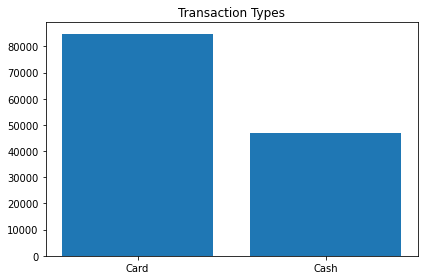

In [36]:
# We plot the result

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.bar(x=t_types.index.tolist(), height=t_types.tolist())
ax.set_title("Transaction Types") # Add a title to the axes.

fig.tight_layout()
fig.show()

* **Q1:** Is the chart informative? 

* **Q2:** Can we do better?

[64.46555206292803, 35.53444793707196]


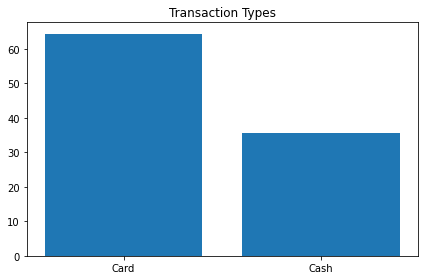

In [37]:
fig, ax = plt.subplots()

tot_types = sum(t_types.tolist())
percentage = [ (v/tot_types)*100 for v in t_types.tolist()]
print(percentage)

bars = ax.bar(t_types.index.tolist(), percentage)

ax.set_title("Transaction Types") # Add a title to the axes.

fig.tight_layout()
fig.show()

* **Q1:** Did we do the right thing?

* **Q2:** Do we need to group data somehow before counting?


In [38]:
#
# Group by "Transaction_ID"
#

t_types = df.groupby(["Transaction_ID"]).agg({'Transaction_Type':'first'})['Transaction_Type'].value_counts()


[64.68105500757552, 35.31894499242448]


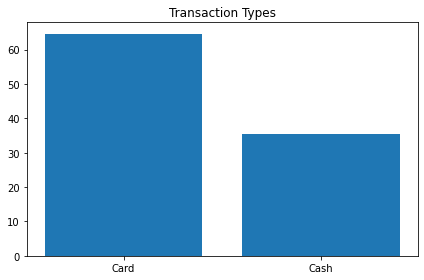

In [39]:
fig, ax = plt.subplots()

tot_types = sum(t_types.tolist())
percentage = [ (v/tot_types)*100 for v in t_types.tolist()]
print(percentage)

ax.bar(x=t_types.index.tolist(), height=percentage)
ax.set_title("Transaction Types") # Add a title to the axes.
fig.tight_layout()
fig.show()

#### To get the right result we must group data by Transaction_ID

Values are very close 

* Without **groupby** 
    * [64.46555206292803, 35.53444793707196]

* With **groupby**
    * [64.68105500757552, 35.31894499242448]



### **Sales Data**

* **Q1:** How are distributed our sales over time?

* **Q2:** Which is the more profitable month of the year?

* **Q3:** Which is the day of the week preferred by our customers?

* **Q4:** Which is the quarter with the higest volume of sales?

* **Q5:** How do we analyse sales amounts by quarter, month, week, and day?

In [40]:
# We create a new dataframe containing individual breakdowns 
# of time period and sales amount

sales_time = df.sort_values('Date').copy().reset_index()
sales_time.drop(columns=["index"], inplace=True)

# The quarter of the date.
sales_time['Quarter']= sales_time['Date'].dt.quarter

# The month as January=1, December=12.
sales_time['Month']= sales_time['Date'].dt.month

# The week number.
sales_time['Week']= sales_time['Date'].dt.isocalendar().week

# The day of the week with Monday=0, Sunday=6.
sales_time['Day of Week']= sales_time['Date'].dt.dayofweek 

sales_time.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Quarter,Month,Week,Day of Week
0,2016-01-02,691,4851,C3Y,HIWFG,1.0,8.76,16,Card,1,1,53,5
1,2016-01-02,4834,4884,FU5,29DS1,3.0,28.02,8,Card,1,1,53,5
2,2016-01-02,4834,4884,LPF,2228Z,1.0,18.32,8,Card,1,1,53,5
3,2016-01-02,7230,4883,MOE,FE0QB,1.0,6.57,19,Card,1,1,53,5
4,2016-01-02,4909,4882,6BZ,3YDVF,1.0,31.77,19,Card,1,1,53,5


* **Q1:** Do you notice anything strange in the dataframe?

* **Q2:** Why are the first days of the year assigned to week 53?

In [41]:
# The first week of year 2016 starts on the 4th of January
#
# The first days of year 2016 are part ho the last week of year 2015

ts = pd.Timestamp(2016, 1, 3)
print(ts.week)

ts = pd.Timestamp(2016, 1, 4)
print(ts.week)

53
1


* **Q1:** Can our observation lead to any problem during the analysis?

* **Q2:** Do we need to modify the 'Week' column? For which rows? How?


In [42]:
# We set to Week=0 the first 3 days of the year

sales_time['Week'].loc[ sales_time['Date'] <= pd.Timestamp(2016, 1, 3) ] = 0
sales_time

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Hour,Transaction_Type,Quarter,Month,Week,Day of Week
0,2016-01-02,691,4851,C3Y,HIWFG,1.0,8.76,16,Card,1,1,0,5
1,2016-01-02,4834,4884,FU5,29DS1,3.0,28.02,8,Card,1,1,0,5
2,2016-01-02,4834,4884,LPF,2228Z,1.0,18.32,8,Card,1,1,0,5
3,2016-01-02,7230,4883,MOE,FE0QB,1.0,6.57,19,Card,1,1,0,5
4,2016-01-02,4909,4882,6BZ,3YDVF,1.0,31.77,19,Card,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131701,2016-12-31,16860,64622,Q4N,MRE4J,1.0,3.41,19,Cash,4,12,52,5
131702,2016-12-31,16860,64622,R6E,V6P7N,1.0,2.13,19,Cash,4,12,52,5
131703,2016-12-31,16860,64622,R6E,F90L2,1.0,2.49,19,Cash,4,12,52,5
131704,2016-12-31,16975,64615,R6E,VLPE5,1.0,8.46,18,Cash,4,12,52,5


* **Q1:** How do we get a summary of our data?

In [43]:
# get a detailed summary of this data

sales_time.describe()

# ** NOTE **
#
# DataFrame.describe()
#
#   For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 
#   50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. 
#   The 50 percentile is the same as the median.
#
#   For mixed data types provided via a DataFrame, the default is to return only an analysis 
#   of numeric columns.
#
# ** NOTE **

,Customer_ID,Transaction_ID,Quantity,Sales_Amount,Hour,Quarter,Month,Week,Day of Week
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524,14.231090,2.544744,6.654587,26.841275,2.769342
std,6086.447552,18709.901238,3.872667,19.359699,3.257412,1.112805,3.450619,15.077240,1.893156
min,1.000000,1.000000,0.010000,0.020000,8.000000,1.000000,1.000000,0.000000,0.000000
25%,7349.000000,16134.000000,1.000000,4.230000,11.000000,2.000000,4.000000,14.000000,1.000000
50%,13496.000000,32620.000000,1.000000,6.920000,15.000000,3.000000,7.000000,27.000000,3.000000
75%,17306.000000,48548.000000,1.000000,12.330000,17.000000,4.000000,10.000000,40.000000,4.000000
max,22625.000000,64682.000000,400.000000,707.730000,20.000000,4.000000,12.000000,52.000000,6.000000


**count**: count number of non-NA/null observations. All columns have 131706 rows, so there are no missing fields.

For each coulmn, we get a summary of how data are distributed: **mean**, **std** (standard deviation), **min**, **max**, **percentiles** and **median** (the 50 percentile).

* **Q1:** What do we observe?

* **Q2:** The summary is meaningfull for all columns of our dataframe?

* **Q3:** Should we group rows somehow?

In [44]:
# We group sales by transaction

sales_time.groupby('Transaction_ID').agg({'Sales_Amount':'sum', 'Quantity': 'sum', 'Hour': 'max'}).describe()

,Sales_Amount,Quantity,Hour
count,64682.000000,64682.000000,64682.000000
mean,24.396874,3.024403,14.217495
std,38.613117,6.298796,3.261210
min,0.030000,0.100000,8.000000
25%,6.360000,1.000000,11.000000
50%,12.210000,2.000000,15.000000
75%,25.180000,3.000000,17.000000
max,707.730000,408.000000,20.000000


In [45]:
# ** NOTE **
#
# For object data (e.g. strings or timestamps), the result’s index will include count, unique, 
# top, and freq. The top is the most common value. The freq is the most common value’s frequency. 
# Timestamps also include the first and last items.
#
# ** NOTE **

sales_time[['SKU','SKU_Category','Transaction_Type']].describe()

,SKU,SKU_Category,Transaction_Type
count,131706,131706,131706
unique,5242,187,2
top,UNJKW,N8U,Card
freq,2007,10913,84905


* The **top** is the most common value. 

* The **freq** is the most common value’s frequency.

### **Plotting Sales Data**

* **Q1:** How do we visualize information about sales amounts?

In [46]:
# We create a group for each plot: Quarter, Month, Week, and Day

sales_by_quarter = sales_time.groupby(['Quarter'], as_index=False).agg({'Sales_Amount':'sum'})

sales_by_month = sales_time.groupby(['Month'], as_index=False).agg({'Sales_Amount':'sum'})

sales_by_week = sales_time.groupby(['Week'], as_index=False).agg({'Sales_Amount':'sum'})

sales_by_weekday = sales_time.groupby(['Day of Week'], as_index=False).agg({'Sales_Amount':'sum'})

# ** NOTE **
#
# as_index=False
#
#     The groupby operation will not use the group as index for the new dataframe.
#
#     Below there are two example to clarify the difference.    
#
# ** NOTE **

* **Q1:** How does the as_index parameter work?



In [47]:
#
# as_index = True
#
sales_time.groupby(['Quarter']).agg({'Sales_Amount':'sum'})

,Sales_Amount
Quarter,
1,360515.05
2,401445.97
3,400525.88
4,415551.72


In [48]:
#
# as_index = False
#
sales_by_quarter

,Quarter,Sales_Amount
0,1,360515.05
1,2,401445.97
2,3,400525.88
3,4,415551.72



* **Q1:** Do we need to group sales by transaction? Why?

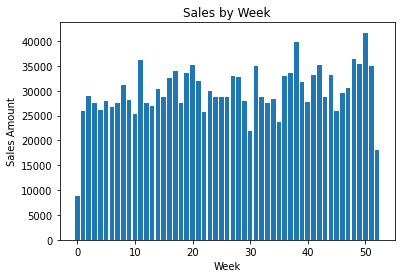

In [49]:

fig, ax = plt.subplots()

ax.bar(x=sales_by_week['Week'], height=sales_by_week['Sales_Amount'])

ax.set_xlabel('Week') # Add an x-label to the axes.
ax.set_ylabel('Sales Amount') # Add a y-label to the axes.
ax.set_title("Sales by Week") # Add a title to the axes.

fig.show()

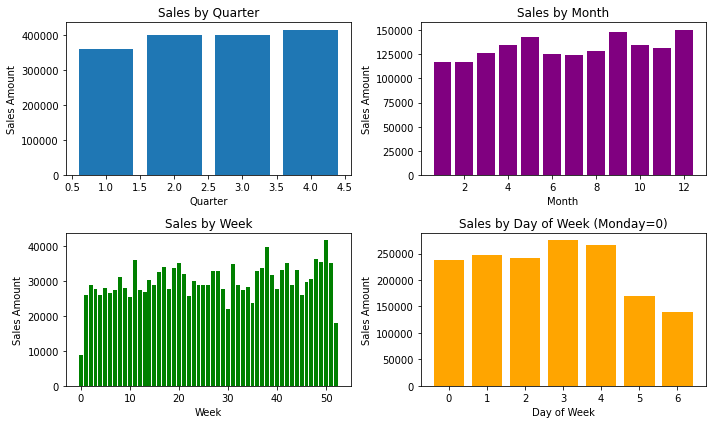

In [50]:
sales_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axs[0,0].bar(x=sales_by_quarter['Quarter'], height=sales_by_quarter['Sales_Amount'])
axs[0,0].set_xlabel('Quarter') 
axs[0,0].set_ylabel('Sales Amount') 
axs[0,0].set_title("Sales by Quarter") 

axs[0,1].bar(x=sales_by_month['Month'], height=sales_by_month['Sales_Amount'], color='purple')
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Sales Amount')
axs[0,1].set_title("Sales by Month")

axs[1,0].bar(x=sales_by_week['Week'], height=sales_by_week['Sales_Amount'], color='green')
axs[1,0].set_xlabel('Week') 
axs[1,0].set_ylabel('Sales Amount') 
axs[1,0].set_title("Sales by Week")

axs[1,1].bar(x=sales_by_weekday['Day of Week'], height=sales_by_weekday['Sales_Amount'], color='orange')
axs[1,1].set_xlabel('Day of Week')
axs[1,1].set_ylabel('Sales Amount')
axs[1,1].set_title("Sales by Day of Week (Monday=0)")

sales_fig.tight_layout()
sales_fig.show()

### The charts give us a quick idea of the spread of sales

* Sundays and Saturdays are typically low earning days, wherese Thursday seems the more profitable day of the week.

* September and December are the months with the higest amount of sales.

* Q1 is the less profitable quarter, wherese Q4 is the quarter with the higest amount of sales.


### **Exercise**

#### **Q1:** Which are the weeks with the highest volume of sales (top 5 weeks)? 

#### **Q2:** Why are those the weeks with the highest volume of sales?

In [51]:
# The code goes here!

---
---

### **Plotting Transaction Data**

* **Q1:** How are transactions distributed over the year?

* **Q2:** Which is the month with the higest number of transaction?

* **Q3:** Which is the day of the week with the lowest number of transaction?


In [52]:
# We create a group for each plot: Quarter, Month, Week, and Day

transaction_by_quarter = sales_time.groupby('Quarter', as_index=False).agg({'Transaction_ID':'nunique'})

transaction_by_month = sales_time.groupby('Month', as_index=False).agg({'Transaction_ID':'nunique'})

transaction_by_week = sales_time.groupby('Week', as_index=False).agg({'Transaction_ID':'nunique'})

transaction_by_weekday = sales_time.groupby('Day of Week', as_index=False).agg({'Transaction_ID':'nunique'})


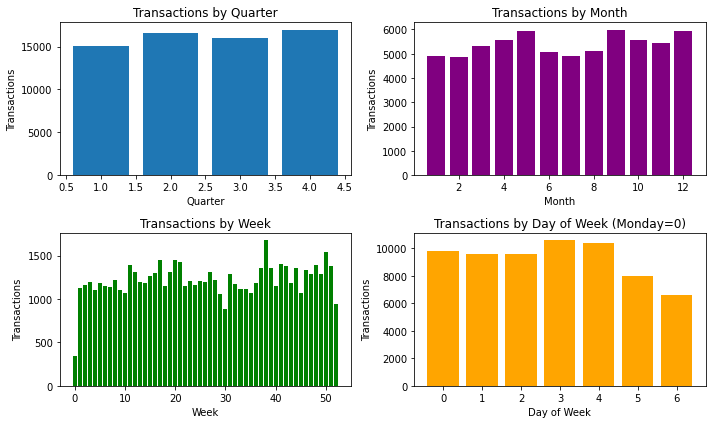

In [53]:
transaction_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axs[0,0].bar(x=transaction_by_quarter['Quarter'], height=transaction_by_quarter['Transaction_ID'])
axs[0,0].set_xlabel('Quarter') 
axs[0,0].set_ylabel('Transactions') 
axs[0,0].set_title("Transactions by Quarter") 

axs[0,1].bar(x=transaction_by_month['Month'], height=transaction_by_month['Transaction_ID'], color='purple')
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Transactions')
axs[0,1].set_title("Transactions by Month")

axs[1,0].bar(x=transaction_by_week['Week'], height=transaction_by_week['Transaction_ID'], color='green')
axs[1,0].set_xlabel('Week') 
axs[1,0].set_ylabel('Transactions') 
axs[1,0].set_title("Transactions by Week")

axs[1,1].bar(x=transaction_by_weekday['Day of Week'], height=transaction_by_weekday['Transaction_ID'], color='orange')
axs[1,1].set_xlabel('Day of Week')
axs[1,1].set_ylabel('Transactions')
axs[1,1].set_title("Transactions by Day of Week (Monday=0)")

transaction_fig.tight_layout()
transaction_fig.show()

* The distribution of transactions over time is quite similar to sales distribution.

  * **Q1:** Is that somenthing we should have expected?

  * **Q2:** How can we investigate this relation?


### **Sales Amounts VS Transactions**

* **Q1:** How the number of transactions and sales amounts are related?

* **Q2:** Does a higher number of transactions always indicate a higher sales amount?

In [54]:
#
# We compare the number of transactions against the sales amount over the same time frame.
#
# We create a group for each plot: Quarter, Month, Week, and Day
#

trs_sales_quarter = sales_time.groupby('Quarter', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

trs_sales_month = sales_time.groupby('Month', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

trs_sales_week = sales_time.groupby('Week', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

trs_sales_weekday = sales_time.groupby('Day of Week', as_index=False).agg({'Transaction_ID':'nunique', 'Sales_Amount':'sum'})

In [55]:
trs_sales_quarter

,Quarter,Transaction_ID,Sales_Amount
0,1,15111,360515.05
1,2,16583,401445.97
2,3,16023,400525.88
3,4,16965,415551.72


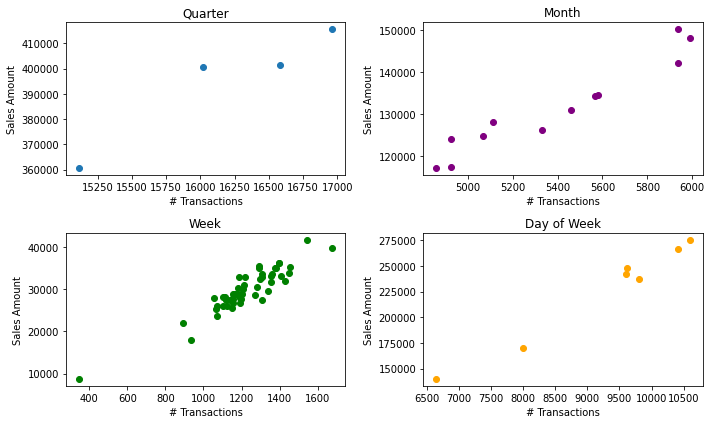

In [56]:
trs_sale_fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

axs[0,0].scatter(x=trs_sales_quarter['Transaction_ID'], y=trs_sales_quarter['Sales_Amount'])
axs[0,0].set_xlabel('# Transactions') 
axs[0,0].set_ylabel('Sales Amount') 
axs[0,0].set_title("Quarter") 

axs[0,1].scatter(x=trs_sales_month['Transaction_ID'], y=trs_sales_month['Sales_Amount'], color='purple')
axs[0,1].set_xlabel('# Transactions')
axs[0,1].set_ylabel('Sales Amount')
axs[0,1].set_title("Month")

axs[1,0].scatter(x=trs_sales_week['Transaction_ID'], y=trs_sales_week['Sales_Amount'], color='green')
axs[1,0].set_xlabel('# Transactions') 
axs[1,0].set_ylabel('Sales Amount') 
axs[1,0].set_title("Week")

axs[1,1].scatter(x=trs_sales_weekday['Transaction_ID'], y=trs_sales_weekday['Sales_Amount'], color='orange')
axs[1,1].set_xlabel('# Transactions')
axs[1,1].set_ylabel('Sales Amount')
axs[1,1].set_title("Day of Week")

trs_sale_fig.tight_layout()
trs_sale_fig.show()

### **Sales Amount Distribution**

* **Q1:** Which is the distribution of sales amounts?

* **Q2:** How much do custumers spend when they visit the store?


In [57]:
# We compute the amount of each transaction

sales_amount = df.groupby('Transaction_ID', as_index=False).agg({'Sales_Amount':'sum'})
sales_amount.head(3)

,Transaction_ID,Sales_Amount
0,1,3.13
1,2,5.46
2,3,6.35


In [58]:
# Check the size of the dataframe

sales_amount.shape

(64682, 2)

In [59]:
sales_amount[['Sales_Amount']].describe()

,Sales_Amount
count,64682.000000
mean,24.396874
std,38.613117
min,0.030000
25%,6.360000
50%,12.210000
75%,25.180000
max,707.730000


* **Q1:** How do we visualize the distribution?

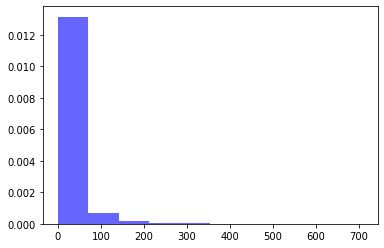

In [60]:
fig, ax = plt.subplots()

num_bins = 10
ax.hist(sales_amount['Sales_Amount'], num_bins, density=True, color='blue', alpha=0.6)

# ** NOTE **
#
# density: bool, default: False
#     If True, draw and return a probability density
#
# alpha: The parameter alpha is used to adjust the transparency of a graph plot.
#
# ** NOTE **

fig.show()

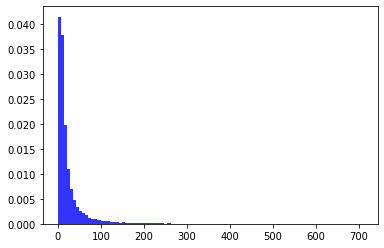

In [61]:
# plot again with more bins

fig, ax = plt.subplots()

num_bins = 100
ax.hist(sales_amount['Sales_Amount'], num_bins, density=True, color='blue', alpha=0.8)

fig.show()

* **Q1:** Wha do we observe from the plot?

 * The distribution has a long right tail.

 * Most of the values are concentrated in the 0-100 interval.

 * The distribution is positively skewed.

#### Skewness

In [62]:
#
# Skewness
#

from scipy.stats import skew

print( f"skewness:\t{skew(sales_amount['Sales_Amount'])}" )
print( f"mode:\t{sales_amount['Sales_Amount'].mode()[0]}" )
print( f"median:\t{sales_amount['Sales_Amount'].median()}" )
print( f"mean:\t{sales_amount['Sales_Amount'].mean()}" )

skewness:	4.88033296345249
mode:	6.75
median:	12.21
mean:	24.396874246312727


* Right/Positive skewed distribution, with a long tail.

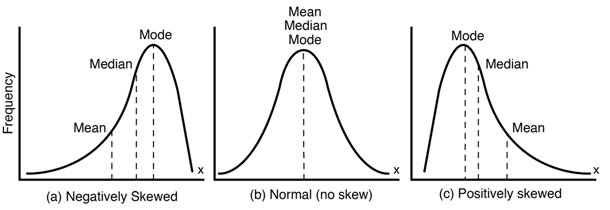

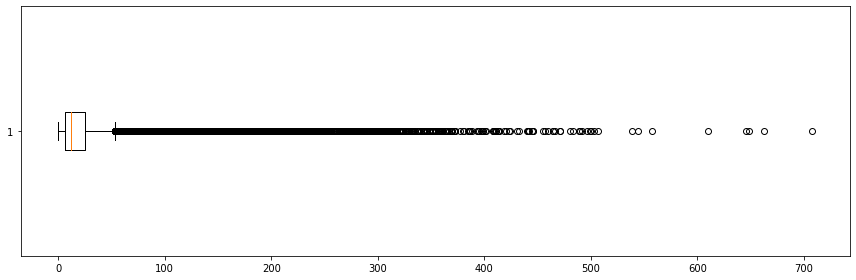

In [63]:
# Let's visualize it with another kind of plot

fig, ax = plt.subplots(figsize=(12, 4))
ax.boxplot(sales_amount['Sales_Amount'],  vert=False)

# ** NOTE **
#
# vert bool, default: True
#     If True, draws vertical boxes. If False, draw horizontal boxes.
#
# ** NOTE **

fig.tight_layout()
fig.show()

* The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. 

* The whiskers extend from the box by 1.5x the inter-quartile range (IQR). 
    * IQR = Q3 - Q1 

* Flier points (outliers) are those past the end of the whiskers.
    * An outlier is a point or set of data points that lie away from the rest of the data values of the dataset.

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```



### **Excercise**

The shape of the distribution suggest that sales amounts follow a power law: one quantity varies as a power of another. 

  * The number of transactions of amount is *x* is proportional to $x^{-a}$.

  * **Q1:** How can we further investigate this relation?

    * We plot the distribution in a log-log scale, a line is a further sign of a power law relation.

    * $y = x^{-a}$ 

    * $\log y = -a \log x$




In [64]:
# The code goes here!

### **Exercise**

* **Q1:** Are more important small transactions or large transactions for the store?

* **Q2:** Which transactions generate the most revenue?




In [65]:
# The code goes here!

### **Transactions by hour**

**Q1:** When do customers visit the store during the day?

**Q2:** Which are the rushing hours?

**Q3:** Which are the hours with the lowest number of customers?

In [66]:
#
# We group rows by Transaction_ID 
#

trs = df.groupby('Transaction_ID', as_index=False).agg({'Hour':'first'})

trs_hour = trs.groupby('Hour', as_index=False).agg({'Transaction_ID':'size'})

trs_hour.head(3)


,Hour,Transaction_ID
0,8,2386
1,9,3537
2,10,4625


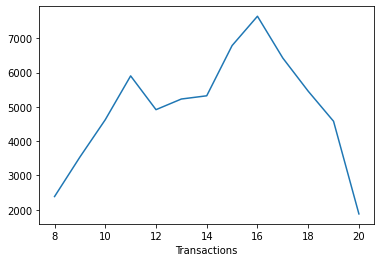

In [67]:
fig, ax = plt.subplots()

ax.plot(trs_hour['Hour'], trs_hour['Transaction_ID'])
ax.set_xlabel('Working Hours')
ax.set_xlabel('Transactions')

fig.show()

* The peak of customers is in the afternoon at 16:00.

* The number of customers decreases around lunch time.

* The peak in the morning is at 11:00.



### **Exercise**

 * **Q1:** How do we check that the two peaks are at 16:00 and 11:00?

In [68]:
# The code goes here!